# test goes-orthorectify functions

Orthorectify and clip a GOES ABI image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os

In [2]:
import goes_ortho

#### Pick an ABI image and a DEM

In [3]:
image_path =  r'\\j-lundquist-3.ce.washington.edu\storage\GOES\goes16\2017\04\21\ABI-L1b-RadC\17\C14\OR_ABI-L1b-RadC-M4C14_G16_s20171111750224_e20171111755027_c20171111755074.nc'

dem_filename = 'dem.tif' # local file

### Orthorectify and output new NetCDF file:

#### 1. generate the pixel mapping

In [4]:
pixel_map = goes_ortho.make_ortho_map(image_path, dem_filename)


RUNNING: make_ortho_map()

Opening GOES ABI image...

Get inputs: projection information from the ABI radiance product
...done

Opening DEM file...

Create 2D arrays of longitude and latitude from the DEM
...done

For each grid cell in the DEM, compute the corresponding ABI scan angle (x and y, radians)
...done

Create metadata dictionary about this map
...done

Create pixel map dataset
...done

Return the pixel map dataset.


#### 2. apply to orthorectify an image

In [5]:
goes_ortho.orthorectify_abi_rad(image_path, pixel_map, out_filename='test_ortho.nc')


RUNNING: orthorectify_abi_rad()

Does the projection info in the image match our mapping?

Opening GOES ABI image...
perspective_point_height + semi_major_axis:	42164160.0	42164160.0
semi_major_axis:				6378137.0	6378137.0
semi_minor_axis:				6356752.31414	6356752.31414
longitude_of_projection_origin:			-89.5		-89.5
...done

Map (orthorectify) and clip the image to the pixel map
...done

Output this result to a new NetCDF file
Saving file as: test_ortho.nc

RUNNING: output_ortho_netcdf()
...done


#### open the output file and check it out

<xarray.Dataset>
Dimensions:         (x: 1995, y: 1501)
Coordinates:
    longitude       (x) float64 ...
    latitude        (y) float64 ...
    dem_px_angle_x  (y, x) float64 ...
    dem_px_angle_y  (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    elevation       (y, x) float64 ...
    rad             (y, x) float32 ...
Attributes:
    longitude_of_projection_origin:       -89.5
    semi_major_axis:                      6378137.0
    semi_minor_axis:                      6356752.31414
    satellite_height:                     42164160.0
    grs80_eccentricity:                   0.0818191910435
    longitude_of_projection_origin_info:  longitude of geostationary satellit...
    semi_major_axis_info:                 semi-major axis of GRS 80 reference...
    semi_minor_axis_info:                 semi-minor axis of GRS 80 reference...
    satellite_height_info:                distance from center of ellipsoid t...
    grs80_eccentricity_info:              eccen

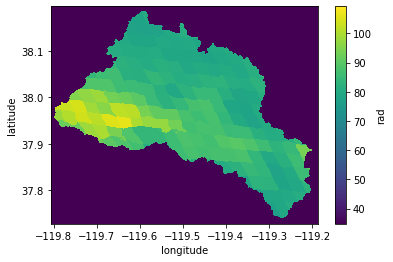

In [6]:
example_ds = xr.open_dataset('test_ortho.nc')
example_ds.rad.plot(x='longitude',y='latitude')
print(example_ds)
print(example_ds.rad)
example_ds.close()